<a href="https://colab.research.google.com/github/kridtapon/Compund-Interest-BRK/blob/main/Compund_Interest_BRK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

# Define the stock symbol and time period
symbols = ['BRK-A', 'SPY']  # Use proper stock symbols and separate them into a list
start_date = '2000-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbols, start=start_date, end=end_date)['Close']

# Forward fill missing values
df.ffill(inplace=True)

[*********************100%***********************]  2 of 2 completed


In [ ]:
df

Ticker,BRK-A,SPY
Date,,
2000-01-03,54800.0,145.437500
2000-01-04,52000.0,139.750000
2000-01-05,53200.0,140.000000
2000-01-06,55000.0,137.750000
2000-01-07,56500.0,145.750000
...,...,...
2024-12-24,687442.0,601.299988
2024-12-26,687600.0,601.340027
2024-12-27,684909.0,595.010010


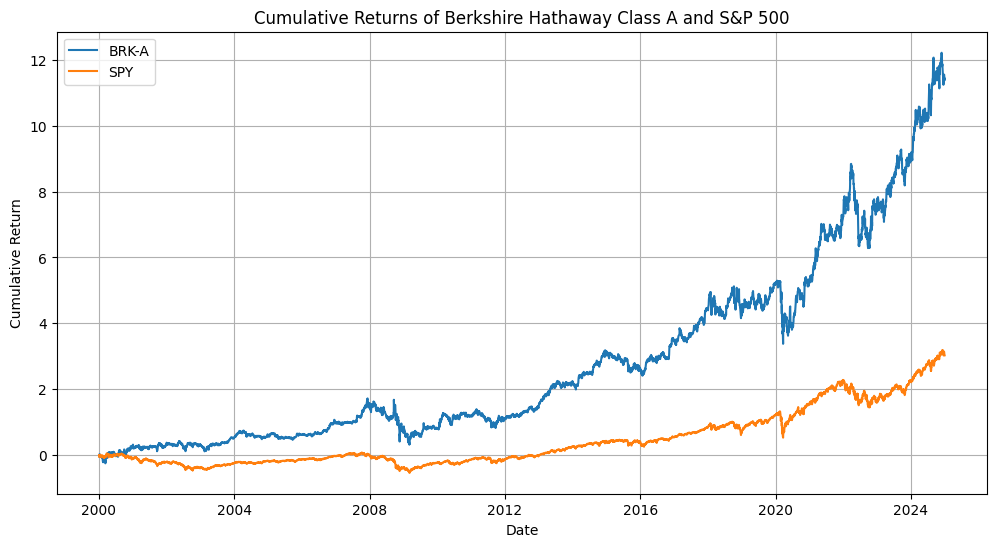

In [ ]:
import matplotlib.pyplot as plt

# Calculate the cumulative returns
def calculate_cumulative_returns(data):
    returns = data.pct_change().fillna(0)
    cumulative_returns = (1 + returns).cumprod() - 1
    return cumulative_returns

# Calculate cumulative returns
cumulative_returns = calculate_cumulative_returns(df)

# Plot cumulative returns
plt.figure(figsize=(12, 6))
for symbol in symbols:
    plt.plot(cumulative_returns.index, cumulative_returns[symbol], label=symbol)

plt.title('Cumulative Returns of Berkshire Hathaway Class A and S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

In [ ]:
cumulative_returns

Ticker,BRK-A,SPY
Date,,
2000-01-03,0.000000,0.000000
2000-01-04,-0.051095,-0.039106
2000-01-05,-0.029197,-0.037387
2000-01-06,0.003650,-0.052858
2000-01-07,0.031022,0.002149
...,...,...
2024-12-24,11.544562,3.134422
2024-12-26,11.547445,3.134697
2024-12-27,11.498339,3.091173


[*********************100%***********************]  2 of 2 completed
<ipython-input-17-caf7bf6be46f>:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_returns = df.resample('Y').ffill().pct_change().dropna()


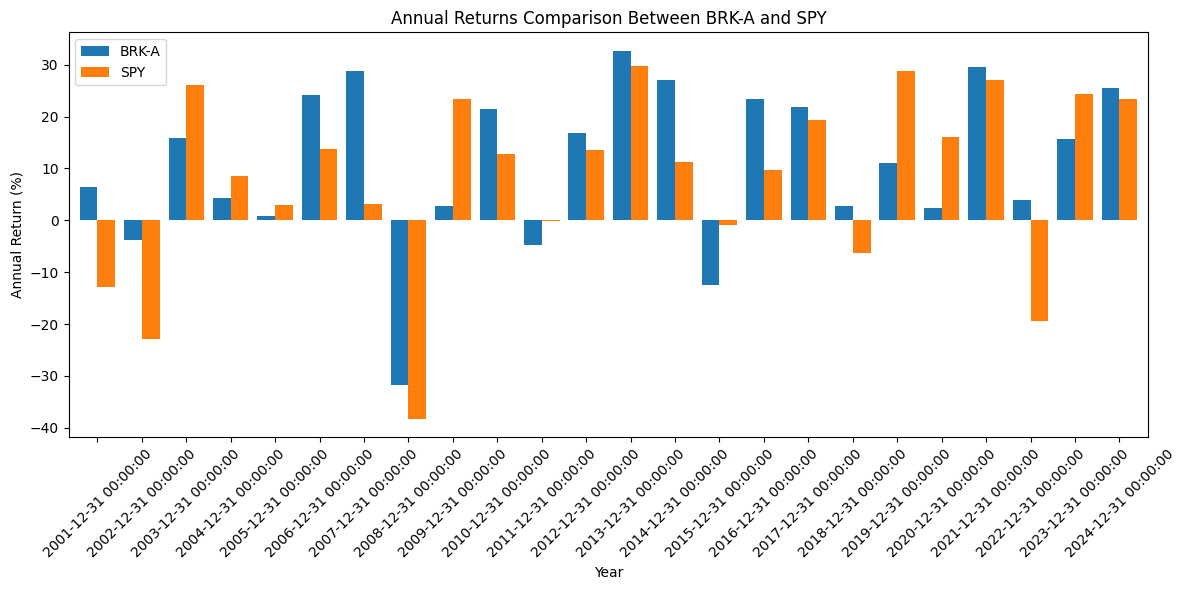

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock symbols and time period
symbols = ['BRK-A', 'SPY']
start_date = '2000-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbols, start=start_date, end=end_date)['Close']

# Forward fill missing values
df.ffill(inplace=True)

# Calculate annual returns
annual_returns = df.resample('Y').ffill().pct_change().dropna()

# Prepare data for plotting
returns_comparison = annual_returns * 100  # Convert to percentage

# Plot the bar chart
returns_comparison.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Annual Returns Comparison Between BRK-A and SPY')
plt.ylabel('Annual Return (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(symbols, loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the difference in returns between the two symbols
annual_returns['Difference'] = (annual_returns[symbols[0]] - annual_returns[symbols[1]]) * 100  # Convert to percentage

# Print the dataframe # 9 loss 15 win
annual_returns

Ticker,BRK-A,SPY,Difference
Date,,,
2001-12-31,0.064789,-0.128728,19.351667
2002-12-31,-0.037698,-0.228084,19.038557
2003-12-31,0.158076,0.261249,-10.317335
2004-12-31,0.043323,0.086179,-4.285560
2005-12-31,0.008191,0.030115,-2.192387
2006-12-31,0.241142,0.137419,10.372333
2007-12-31,0.287390,0.032411,25.497900
2008-12-31,-0.317797,-0.382806,6.500899
2009-12-31,0.026915,0.234929,-20.801402


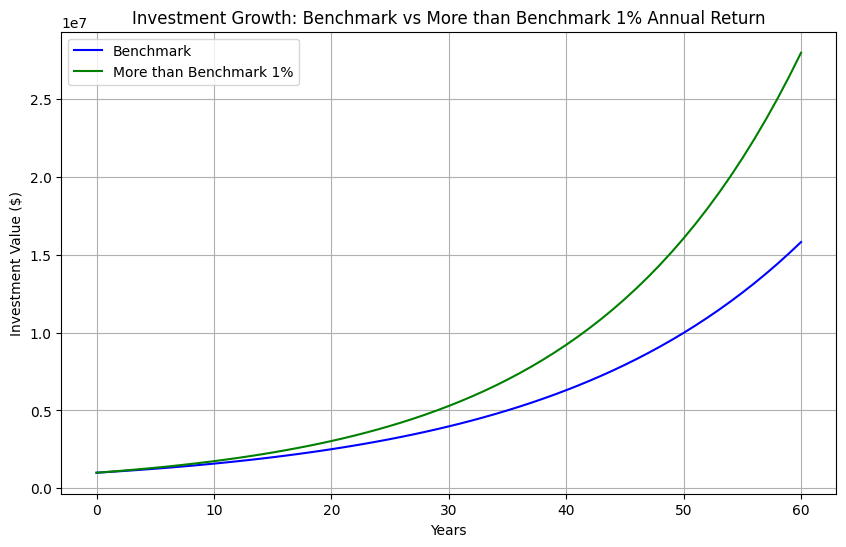

In [ ]:
import matplotlib.pyplot as plt

# Initial investment
initial_investment = 1000000

# Annual returns
returns = [0.0471, 0.0571]

# Time horizon (in years)
years = 60

# Function to simulate investment growth
def simulate_growth(principal, rate, years):
    balance = principal
    growth = [balance]
    for _ in range(years):
        balance *= (1 + rate)
        growth.append(balance)
    return growth

# Simulate the growth for 5% and 6% annual returns
growth_benchmark = simulate_growth(initial_investment, returns[0], years)
growth_more_1 = simulate_growth(initial_investment, returns[1], years)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(range(years + 1), growth_benchmark, label='Benchmark', color='blue')
plt.plot(range(years + 1), growth_more_1, label='More than Benchmark 1%', color='green')
plt.xlabel('Years')
plt.ylabel('Investment Value ($)')
plt.title('Investment Growth: Benchmark vs More than Benchmark 1% Annual Return')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
growth_benchmark

[1000000,
 1047099.9999999999,
 1096418.4099999997,
 1148059.7171109996,
 1202133.3297869277,
 1258753.809619892,
 1318041.1140529888,
 1380120.8505248844,
 1445124.5425846064,
 1513189.9085403413,
 1584461.1532325912,
 1659089.2735498461,
 1737232.3783340438,
 1819056.0233535771,
 1904733.5620535305,
 1994446.5128262516,
 2088384.9435803678,
 2186747.874423003,
 2289743.699308326,
 2397590.627545748,
 2510517.1461031525,
 2628762.5036846106,
 2752577.2176081557,
 2882223.6045574998,
 3017976.3363321577,
 3160123.021773402,
 3308964.816098929,
 3464817.0589371882,
 3628009.9424131294,
 3798889.2107007876,
 3977816.892524794,
 4165172.068162712,
 4361351.672573175,
 4566771.336351371,
 4781866.266293521,
 5007092.167435946,
 5242926.208522178,
 5489868.032943573,
 5748440.817295215,
 6019192.379789819,
 6302696.340877919,
 6599553.338533269,
 6910392.300778186,
 7235871.778144838,
 7576681.33889546,
 7933543.029957435,
 8307212.906668429,
 8698482.634572512,
 9108181.166660877,
 9537176

In [ ]:
growth_more_1

[1000000,
 1057100.0,
 1117460.41,
 1181267.3994109998,
 1248717.7679173679,
 1320019.5524654496,
 1395392.6689112266,
 1475069.5903060576,
 1559296.0639125335,
 1648331.869161939,
 1742451.6188910857,
 1841945.6063297666,
 1947120.7004511962,
 2058301.2924469593,
 2175830.2962456807,
 2300070.206161309,
 2431404.2149331197,
 2570237.3956058007,
 2716997.9508948918,
 2872138.53389099,
 3036137.6441761656,
 3209501.1036586245,
 3392763.6166775315,
 3586490.419189818,
 3791279.0221255566,
 4007761.0542889256,
 4236604.210488823,
 4478514.310907735,
 4734237.478060566,
 5004562.438057824,
 5290322.953270925,
 5592400.393902695,
 5911726.456394538,
 6249286.037054666,
 6606120.269770487,
 6983329.7371743815,
 7382077.8651670385,
 7803594.511268076,
 8249179.757861482,
 8720207.922035372,
 9218131.794383591,
 9744487.119842893,
 10300897.33438592,
 10889078.572179355,
 11510844.958650796,
 12168114.205789756,
 12862913.52694035,
 13597385.889328642,
 14373796.623609306,
 15194540.410817396,